<a href="https://colab.research.google.com/github/sosullivan7221/datasci_6_regression/blob/main/507regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7

## Packages

In [2]:
!pip install ucimlrepo

In [15]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Dataset

In [5]:
# fetch dataset
computer_hardware = fetch_ucirepo(id=29)

# data (as pandas dataframes)
X = computer_hardware.data.features
y = computer_hardware.data.targets

df = pd.DataFrame(X)
df

## This dataset looks at performance data for a number of different CPU models from varying companies.

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


## Simple Regression

The simple regression will be conducted looking at the relationship between the CPU's maximum main memory (df[MMAX]) and the CPU's maximum number of channels (df[CHMAX]). The independent variable will be df[CHMAX], and the dependent variable will be df[MMAX].

In [7]:
# Model

X = sm.add_constant(df['CHMAX'])
model = sm.OLS(df['MMAX'], X)
results = model.fit()

In [8]:
# Results

print(results.summary())

residuals = results.resid
fitted = results.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                   MMAX   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     79.70
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           2.37e-16
Time:                        03:35:42   Log-Likelihood:                -2220.3
No. Observations:                 209   AIC:                             4445.
Df Residuals:                     207   BIC:                             4451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7451.5979    845.089      8.818      0.0

### Checking Assumptions

In [9]:
# Linearity

stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.5435150575718908, p-value=0.014238456028979251


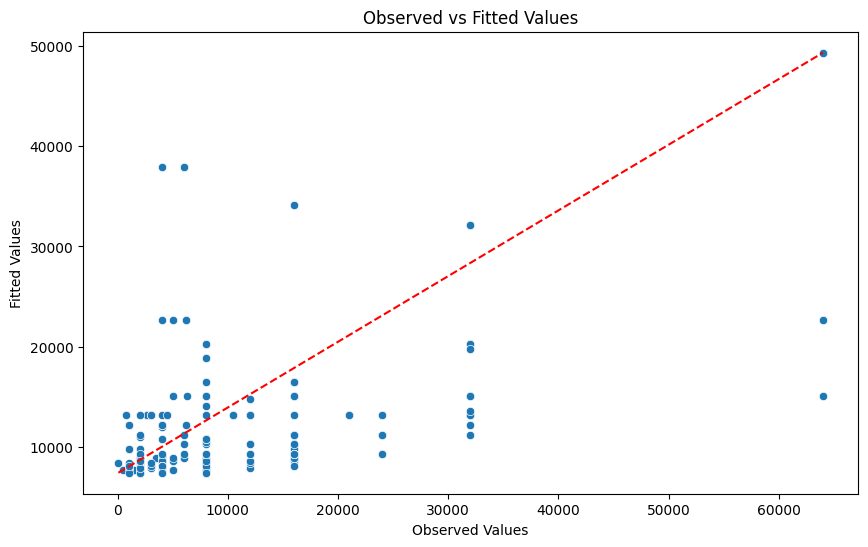

In [10]:
# Plot of Observed vs Fitted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MMAX'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['MMAX']), max(df['MMAX'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [11]:
# Normality

W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9100891947746277, p-value=6.186492984561198e-10


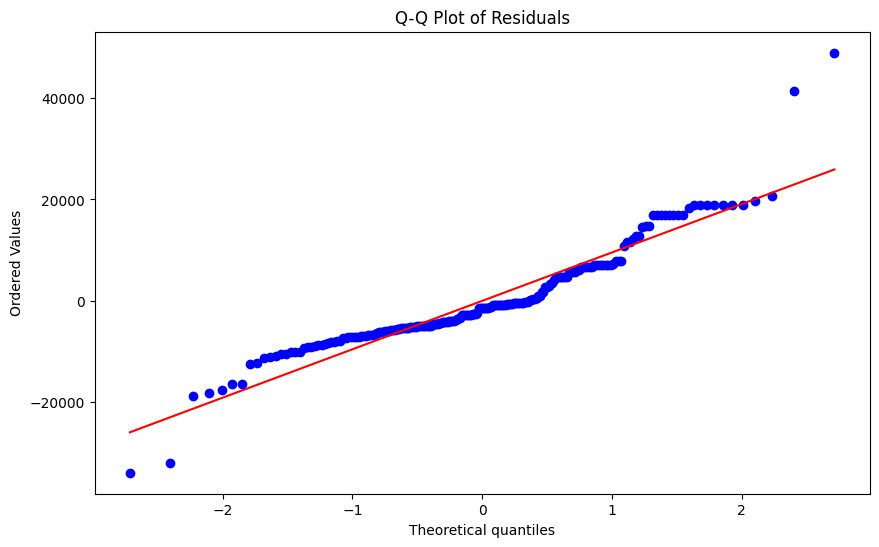

In [12]:
# Q-Q Plot of Residuals

plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [13]:
# Homogeneity

gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.5054963710957459, p-value=0.9996756090476423


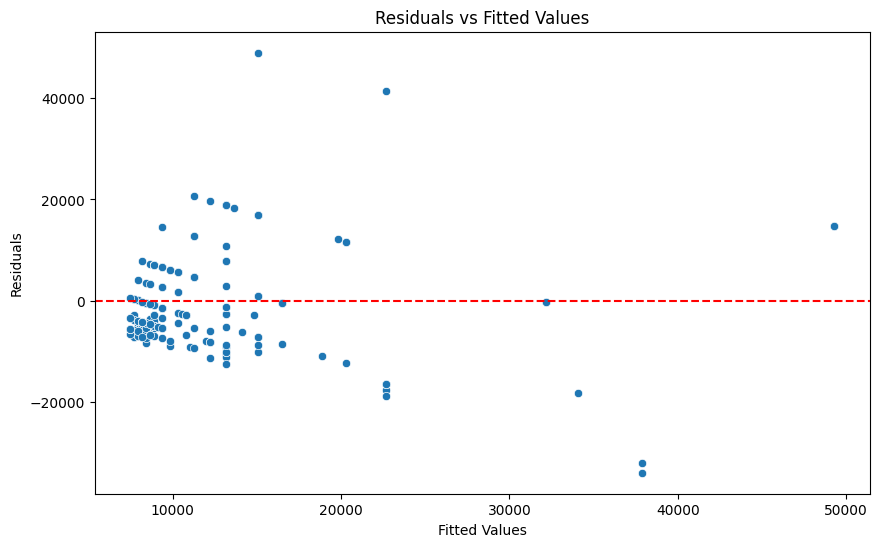

In [14]:
# Plot of Residuals vs Fitted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## Multiple Regression



This Multiple Regression will look at the effect of multiple indepedent varaibles on a single dependent variable. In this regression, the depedent variable is published relative performance (df[PRP]). The independent variables are machine cycle time (df[MYCT]), maximum main memory (df[MMAX]), cache memory (df[CACH]), and maximum channels (df[CHMAX]).

In [16]:
# Plot

X = df[['MYCT', 'MMAX', 'CACH', 'CHMAX']]
X = sm.add_constant(X)
y = df['PRP']
model = sm.OLS(y, X)
results = model.fit()

In [17]:
# Results

print(results.summary())


residuals = results.resid
fitted = results.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     227.4
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           5.48e-74
Time:                        04:01:01   Log-Likelihood:                -1180.5
No. Observations:                 209   AIC:                             2371.
Df Residuals:                     204   BIC:                             2388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.3644      9.290     -5.744      0.0

### Checking Assumptions

In [18]:
# Multicollinearity

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
  Variable       VIF
0    const  3.733902
1     MYCT  1.194929
2     MMAX  1.710397
3     CACH  1.561530
4    CHMAX  1.508340


In [19]:
# Linearity

stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=3.14491918744184, p-value=1.1256841109595093e-08


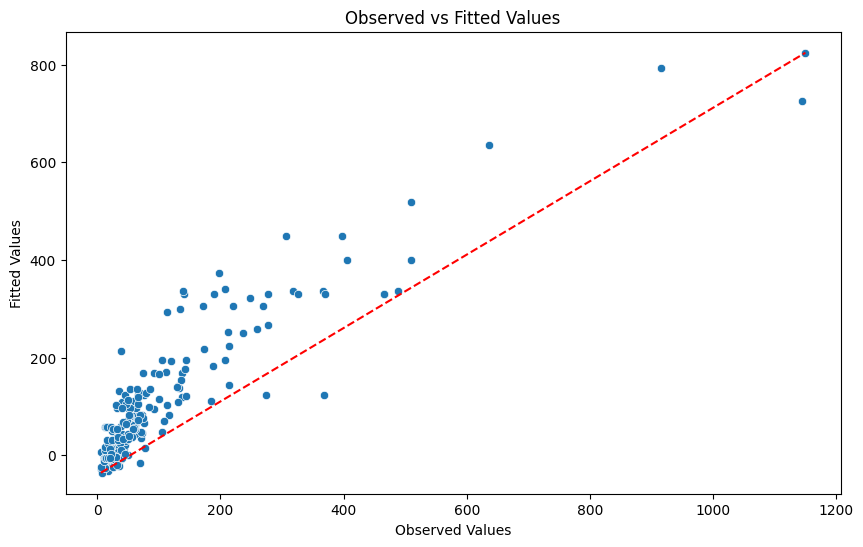

In [21]:
# Plot of observed vs fitted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PRP'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['PRP']), max(df['PRP'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [22]:
# Normality

W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.8458847999572754, p-value=1.2586809307497948e-13


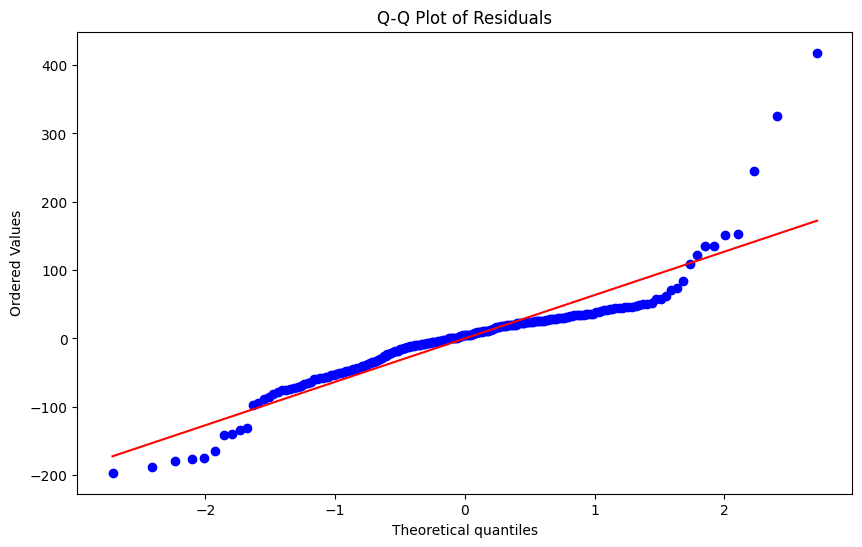

In [23]:
# Q-Q Plot of Residuals

plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [24]:
# Homogeniety

gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.6435325713019989, p-value=0.9854806849236702


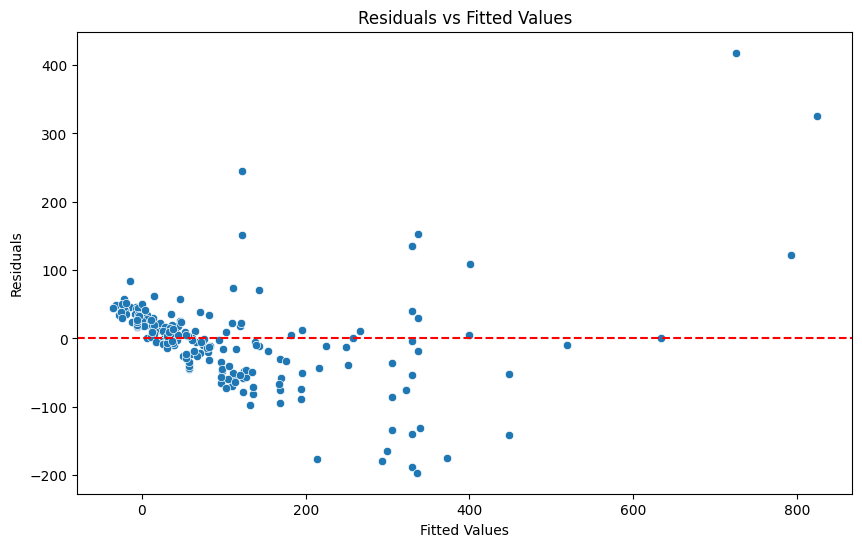

In [25]:
# Plot of residuals vs fitted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()